# Red Recurrente LSTM
## Imports Necesarios

In [11]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')


from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model


## Cargar archivo de Entradas

In [12]:
np.random.seed(1)

In [13]:

#cargamos los datos de entrada
#data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)
data = pd.read_csv("../05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)

# Ver los 1ros registros
data.head()

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
4,2.93,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.254218,0.035
5,2.96,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.035000,0.005
6,2.81,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.035000,0.005000,0.000
7,2.73,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.035000,0.005000,0.000000,0.000
8,2.87,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.035000,0.005000,0.000000,0.000000,0.010


## Separar Datos de Entrenamiento (Train) y Test

In [14]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.

# 75% train y 25% test
data_train, data_test = train_test_split(data,test_size=0.2, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:45]
y_train = dataset_train[:,45]

dataset_test = data_test.values
x_test = dataset_test[:,0:45]
y_test = dataset_test[:,45]


#x_test
x_train[0]

array([5.35486486, 0.266     , 0.266     , 0.266     , 0.266     ,
       0.266     , 0.266     , 0.266     , 0.266     , 0.272     ,
       0.278     , 0.283     , 0.289     , 0.295     , 0.301     ,
       0.306     , 0.312     , 0.318     , 0.324     , 0.329     ,
       0.335     , 0.341     , 0.347     , 0.352     , 0.358     ,
       0.364     , 0.37      , 0.375     , 0.381     , 0.387     ,
       0.393     , 0.398     , 0.404     , 0.433     , 0.439     ,
       0.444     , 0.45      , 0.456     , 0.462     , 0.467     ,
       0.473     , 0.479     , 0.485     , 0.49      , 0.496     ])

In [15]:
y_train[0]

0.502

## Adaptar Datos para LSTM

In [16]:
timesteps = 1

#reshape
x_train_re = x_train.reshape((x_train.shape[0], timesteps, x_train.shape[1]))
x_train = x_train_re


x_test_re = x_test.reshape((x_test.shape[0], timesteps, x_test.shape[1]))
x_test = x_test_re


In [17]:
x_train.shape[1]

1

In [18]:
x_train.shape[2]

45

In [19]:
#x_train

In [20]:
#y_train

In [21]:
#nro_train = len(data_train)

## Crear Modelo, Entrenarlo y Predecir

In [43]:

#csv_logger = keras.callbacks.CSVLogger('training.log', separator=',', append=False)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mch = ModelCheckpoint('best_model_lstm.h5', monitor='val_mean_squared_error', mode='min', verbose=1, save_best_only=True)


#, kernel_constraint=max_norm(3), bias_constraint=max_norm(3))
model = Sequential()
model.add(LSTM(45, return_sequences = True,input_shape=(x_train.shape[1], x_train.shape[2])))


model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = False, activation='relu'))

model.add(Dense(1, activation="linear"))


model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_squared_error'])



hist=model.fit(x_train, y_train, epochs=1000, batch_size=45, verbose=2, shuffle=False, validation_data=(x_test, y_test),callbacks=[es, mch])


Train on 76876 samples, validate on 19220 samples
Epoch 1/1000
 - 199s - loss: 0.0549 - mean_squared_error: 0.0098 - val_loss: 0.0370 - val_mean_squared_error: 0.0050

Epoch 00001: val_mean_squared_error improved from inf to 0.00497, saving model to best_model_lstm.h5
Epoch 2/1000
 - 196s - loss: 0.0364 - mean_squared_error: 0.0052 - val_loss: 0.0336 - val_mean_squared_error: 0.0050

Epoch 00002: val_mean_squared_error did not improve from 0.00497
Epoch 3/1000
 - 195s - loss: 0.0328 - mean_squared_error: 0.0051 - val_loss: 0.0330 - val_mean_squared_error: 0.0049

Epoch 00003: val_mean_squared_error improved from 0.00497 to 0.00491, saving model to best_model_lstm.h5
Epoch 4/1000
 - 191s - loss: 0.0315 - mean_squared_error: 0.0049 - val_loss: 0.0298 - val_mean_squared_error: 0.0046

Epoch 00004: val_mean_squared_error improved from 0.00491 to 0.00460, saving model to best_model_lstm.h5
Epoch 5/1000
 - 190s - loss: 0.0304 - mean_squared_error: 0.0047 - val_loss: 0.0365 - val_mean_squared

 - 220s - loss: 0.0215 - mean_squared_error: 0.0031 - val_loss: 0.0238 - val_mean_squared_error: 0.0032

Epoch 00041: val_mean_squared_error improved from 0.00321 to 0.00316, saving model to best_model_lstm.h5
Epoch 42/1000
 - 221s - loss: 0.0217 - mean_squared_error: 0.0031 - val_loss: 0.0216 - val_mean_squared_error: 0.0031

Epoch 00042: val_mean_squared_error improved from 0.00316 to 0.00312, saving model to best_model_lstm.h5
Epoch 43/1000
 - 192s - loss: 0.0215 - mean_squared_error: 0.0030 - val_loss: 0.0258 - val_mean_squared_error: 0.0032

Epoch 00043: val_mean_squared_error did not improve from 0.00312
Epoch 44/1000
 - 192s - loss: 0.0214 - mean_squared_error: 0.0030 - val_loss: 0.0227 - val_mean_squared_error: 0.0032

Epoch 00044: val_mean_squared_error did not improve from 0.00312
Epoch 45/1000
 - 191s - loss: 0.0216 - mean_squared_error: 0.0030 - val_loss: 0.0239 - val_mean_squared_error: 0.0031

Epoch 00045: val_mean_squared_error did not improve from 0.00312
Epoch 46/1000



Epoch 00084: val_mean_squared_error did not improve from 0.00310
Epoch 85/1000
 - 191s - loss: 0.0188 - mean_squared_error: 0.0023 - val_loss: 0.0232 - val_mean_squared_error: 0.0031

Epoch 00085: val_mean_squared_error did not improve from 0.00310
Epoch 86/1000
 - 191s - loss: 0.0187 - mean_squared_error: 0.0023 - val_loss: 0.0212 - val_mean_squared_error: 0.0031

Epoch 00086: val_mean_squared_error did not improve from 0.00310
Epoch 87/1000
 - 402s - loss: 0.0184 - mean_squared_error: 0.0022 - val_loss: 0.0216 - val_mean_squared_error: 0.0032

Epoch 00087: val_mean_squared_error did not improve from 0.00310
Epoch 88/1000
 - 189s - loss: 0.0186 - mean_squared_error: 0.0023 - val_loss: 0.0238 - val_mean_squared_error: 0.0033

Epoch 00088: val_mean_squared_error did not improve from 0.00310
Epoch 89/1000
 - 224s - loss: 0.0190 - mean_squared_error: 0.0023 - val_loss: 0.0232 - val_mean_squared_error: 0.0031

Epoch 00089: val_mean_squared_error did not improve from 0.00310
Epoch 90/1000



Epoch 00128: val_mean_squared_error did not improve from 0.00300
Epoch 129/1000
 - 193s - loss: 0.0166 - mean_squared_error: 0.0019 - val_loss: 0.0236 - val_mean_squared_error: 0.0032

Epoch 00129: val_mean_squared_error did not improve from 0.00300
Epoch 130/1000
 - 192s - loss: 0.0163 - mean_squared_error: 0.0018 - val_loss: 0.0225 - val_mean_squared_error: 0.0031

Epoch 00130: val_mean_squared_error did not improve from 0.00300
Epoch 131/1000
 - 194s - loss: 0.0163 - mean_squared_error: 0.0018 - val_loss: 0.0214 - val_mean_squared_error: 0.0030

Epoch 00131: val_mean_squared_error did not improve from 0.00300
Epoch 132/1000
 - 194s - loss: 0.0162 - mean_squared_error: 0.0018 - val_loss: 0.0228 - val_mean_squared_error: 0.0035

Epoch 00132: val_mean_squared_error did not improve from 0.00300
Epoch 133/1000
 - 190s - loss: 0.0165 - mean_squared_error: 0.0019 - val_loss: 0.0230 - val_mean_squared_error: 0.0032

Epoch 00133: val_mean_squared_error did not improve from 0.00300
Epoch 134

In [44]:
# load the saved model
best_model = load_model('best_model_lstm.h5')

In [45]:
#best_model.summary()

In [46]:

y_pred_train = best_model.predict(x_train)    
y_pred_test = best_model.predict(x_test) 

## Obtener Metricas del Modelo

In [47]:
# evaluamos el modelo
#scores = model.evaluate(x_train, y_train)
scores = best_model.evaluate(x_train, y_train)

76876/76876 [==============================] - 46s 601us/step


In [48]:
#print("R2:",  r2_keras(y_train, y_pred_train) )
print("\n%s: %.2f%%" % (best_model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
#print (model.predict(x_train).round())


loss: 1.72%

mean_squared_error: 0.19%


In [49]:
from sklearn.metrics import r2_score
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))
print('Coefficient of determination Test (R^2): %.2f' % r2_score(y_test, y_pred_test))

Coefficient of determination Train (R^2): 0.97
Coefficient of determination Test (R^2): 0.95


## Graficar Resultados

In [50]:
neuronas =100
#pred_train = model.predict(x_train)
corr = np.corrcoef(y_train, y_pred_train[:, 0])

In [51]:
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]

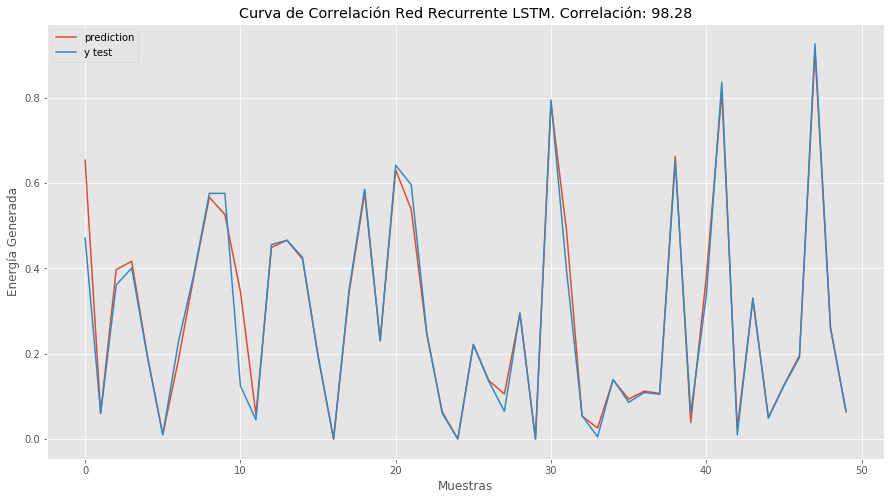

In [52]:
plt.plot(pred_test_plot, label ="prediction")
plt.plot(y_test_plot, label ="y test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Curva de Correlación Red Recurrente LSTM. Correlación: %.2f" % ( corr[1][0] * 100) )
plt.ylabel("Energía Generada")
plt.xlabel("Muestras")
plt.legend()
plt.show()

In [53]:
#registro = pd.read_csv('training.log', sep=",")
#plt.plot(registro["epoch"].values, registro["loss"].values)
#plt.title("Error LSTM con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
#plt.ylabel("Error")
#plt.xlabel("Epocas")
#plt.show()

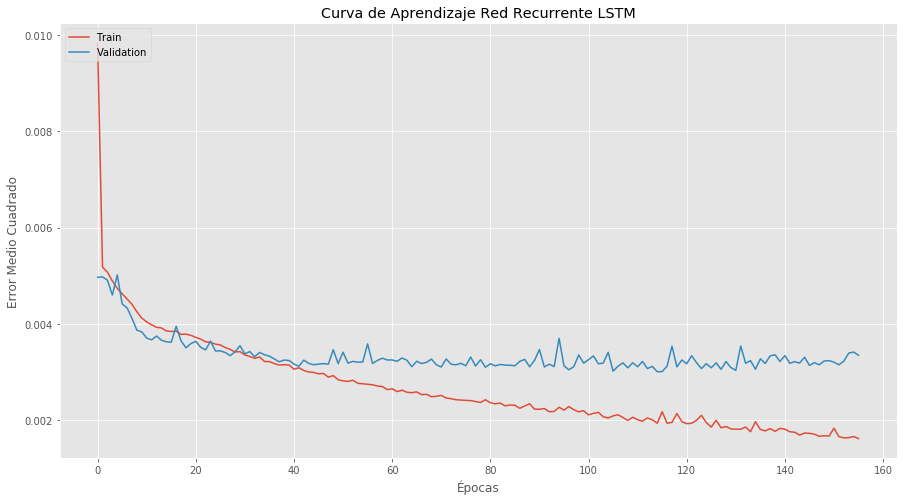

In [54]:
# Plot training & validation accuracy values
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Curva de Aprendizaje Red Recurrente LSTM')
plt.ylabel('Error Medio Cuadrado')
plt.xlabel('Épocas')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


In [41]:

# Plot training & validation loss values
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
#plt.title('Función de Pérdida (loss)')
#plt.ylabel('Pérdida (loss)')
#plt.xlabel('Épocas')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()


In [197]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_LSTM.csv')
